**_I will use color to differentiate instructions for <font color="steelblue">persist mode</font> and <font color="red">pandas mode</font>_**

# Data Analysis

In this notebook you will work with the data for [avalanches in Utah](https://utahavalanchecenter.org/avalanches). The data was sourced from the [Utah Avalanche Center](https://utahavalanchecenter.org/).

We will ask you to perform three basic data analysis tasks. Please follow the instructions and note your findings and/or any issues you face in markdown.

<font color="steelblue">In this notebook, you will be using the persIst extension to perform the tasks. The extension is already installed and enabled in this notebook environment. Please refer to the [tutorial notebook](abc.com) as needed to understand how to use the extension. To create a new interactive chart, you have to create the visualization using the [altair](https://altair-viz.github.io) visualization library. We have interactive charts created for the tasks which you can use directly instead.</font>

<font color="red">In this notebook, you will be using pandas to perform the tasks. Pandas is already installed and enabled in this notebook environment. You are free to use any library like _matplotlib_, _seaborn_, _altair_, etc. to create your visualizations. These libraries are installed as well. You can use the internet to get help with the syntax python or how to use a particular library.</font>

You can add new code and markdown cells as required to complete the tasks.

In [2]:
import altair as alt # Load altair for charting

alt.data_transformers.disable_max_rows() # Disable altair's max row limit.

import pandas as pd # Load pandas for data processing

import persist_ext as PR # Import the extension

## Data Description

The table below describes the different columns in the dataset. Each row in the dataset is a reported avalanche with the location, trigger, aspect of the slow. The data spans multiple years starting from 2004 upto 2023.

| Column          | Description                                                      |
|-----------------|------------------------------------------------------------------|
| Date            | This is the date on which the instance of avalanche was recorded |
| Region          | Region in Utah where the instance was recorded                   |
| Place           | Exact place where the instance was recorded                      |
| Trigger         | The cause of the avalanche                                       |
| Weak Layer      | Layer of the snow that was weakest and likely the one to fail    |
| Depth_inches    |                                                                  |
| Width_inches    |                                                                  |
| Vertical_inches |                                                                  |
| Aspect          | Direction of the slope where the avalanche happened              |
| Elevation_feet  |                                                                  |
| Coordinates     | Approximate location of the avalanche                            |
| Comments 1      | Comments added by the reporter                                   |

In [5]:
df = pd.read_csv('./avalanches_cleaned.csv')
df

,;Date,;Region,Place,;Trigger,;Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet,Coordinates,Comments 1
0,2012-11-09,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0,"40.577977000000, -111.595817000000",While it was a small avalanche that was I caug...
1,2012-11-11,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0,"40.592619000000, -111.616099000000",A North facing aspect with an exposed ridge in...
2,2012-11-11,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0,"40.599291000000, -111.642315000000",Remotely triggered all the new storm snow (abo...
3,2012-11-11,Salt Lake,Emma Ridges,Skier,New Snow,18.0,600.0,6000.0,Southeast,10200.0,"40.598313000000, -111.628304000000",Impressive fast powder cloud ran in front of t...
4,2012-11-11,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0,"40.578590000000, -111.595087000000",Three of us toured from Brighton to low saddle...
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2023-04-22,Salt Lake,Cardiff Bowl,Unknown,New Snow/Old Snow Interface,8.0,720.0,1800.0,East,9800.0,"40.592721660567, -111.649613218710",We spent the day skiing the southerly-facing a...
2388,2023-04-22,Logan,"Miller Bowl, East",Snowmobiler,New Snow/Old Snow Interface,18.0,540.0,4800.0,North,8700.0,"41.886233332343, -111.645074831510","Not sure about the story here, but we observed..."
2389,2023-04-22,Logan,Millville Peak,Snowboarder,New Snow/Old Snow Interface,12.0,3600.0,7200.0,North,8900.0,"41.677564539953, -111.718065248970",Details are a bit limited and we're not sure w...
2390,2023-05-07,Salt Lake,Red Top Mountain,Natural,Unknown,72.0,3000.0,12000.0,West,10800.0,"40.546874131921, -111.663880335390",Saw this avalanche around 9.30 AM from the top...


## Task 1: Cleaning the dataframe

In the first task we will perform some basic data cleaning operations to get our dataset ready for further tasks.

### Task 1a: Removing outliers in the records for Elevation and Depth

Below we have an interactive scatterplot with `Elevation` on the X-axis and `Vertical`. We see that there are some outlier's in the data here, possibly incorrect data input while entering the avalanche instance. We should remove these outlier before we proceed with the analysis.

<font color="steelblue">The scatterplot below is an interactive altair plot. You can select the points in the plot using a rectangular brush. You can only have on brush active at a time.</font>

<font color="steelblue">The extension tries to help you complete the selections faster by suggesting algorithmic selections based on your initial brush. You can look at these suggestions in the **Intent** tab. Hovering on any of the suggested selections, highlights the points that will be selected. If you feel one of the suggested options fits what you wanted to selected, you can click the checkmark button on right of the suggestion to apply the selection.</font>

<font color="steelblue">Once you are satisfied that you have selected the outliers, use the **Filter** button in the header to remove them. After filtering out all the outliers, you can use the generate dataframe button in the header to create a new python variable. Create a new dataframe called **cleaned_df** and print it in the next cell.</font>

<font color="red">The scatterplot below is a scatterplot in seaborn.</font>

<font color="red">Remove the outliers you see in the plots, and print the final plot.</font>

<font color="red">Assign the cleaned dataframe to a variable called **cleaned_df**</font>

Abstract: Remove outliers/cluster based on a pattern

#### <font color="steelblue">Persist solution</font>

In [6]:
PR.vis.scatterplot(df, "Elevation_feet", "Vertical_inches")

OutputWithTrrackWidget(body_widget=VegaLiteChartWidget(debounce_wait=250.0, df_columns=[';Date', ';Region', 'P…

In [4]:
cleaned_df_persist

,;Date,;Region,;Trigger,;Weak Layer,Aspect,Comments 1,Coordinates,Depth_inches,Elevation_feet,Place,Vertical_inches,Width_inches
0,2013-02-03,Uintas,Snowmobiler,Facets,Northeast,Not sure where on the slope this slide was tri...,"40.855013000000, -110.707083000000",16,11000.0,Millcreek,1800.0,1200
1,2021-01-01,Logan,Snowboarder,Facets,West,Very Shallow rider triggered slide across from...,"41.955086005660, -111.540970789520",4,7000.0,Beaver Canyon,360.0,300
2,2018-05-15,Logan,Natural,Unknown,East,First of 3 break-to-the-ground deep slab avala...,"41.921030185963, -111.693985449420",48,9300.0,"Cherry Peak, East Face",4800.0,3600
3,2022-12-31,Logan,Natural,Facets,East,Large natural slab avalanches were apparent th...,"41.677180699017, -112.027609335430",36,8500.0,Gibson Canyon,27000.0,12000
5,2021-02-14,Salt Lake,Natural,Depth Hoar,Unknown,Forecaster notes: We recieved multiple submiss...,"40.669832191946, -111.719326960160",36,9500.0,West Porter,12000.0,42000
...,...,...,...,...,...,...,...,...,...,...,...,...
493,2022-12-21,Logan,Natural,Facets,East,A natural avalanche and a cracked slope in Gar...,"41.923839329855, -111.438446032140",24,7400.0,East of Mahogany Drive,6000.0,6000
496,2010-02-27,Salt Lake,Skier,Unknown,North,Viewed a few days after occurrence. Most like...,"0.000000000000, 0.000000000000",24,9900.0,White Pine Canyon,2400.0,1200
497,2019-01-22,Ogden,Skier,New Snow/Old Snow Interface,South,On my tour today I did not have any other sign...,"41.326665657790, -111.903948771030",7,7000.0,North Ogden Divide,1200.0,180
498,2023-01-16,Salt Lake,Skier,New Snow/Old Snow Interface,North,"Josh skied this short steeper pitch first, whe...","40.664320787071, -111.752886759330",12,7900.0,Thomas Fork,600.0,600


#### <font color="red">Pandas solution</font>

In [5]:
cleaned_df_pandas = cleaned_df_persist
cleaned_df_pandas.head()

,;Date,;Region,;Trigger,;Weak Layer,Aspect,Comments 1,Coordinates,Depth_inches,Elevation_feet,Place,Vertical_inches,Width_inches
0,2013-02-03,Uintas,Snowmobiler,Facets,Northeast,Not sure where on the slope this slide was tri...,"40.855013000000, -110.707083000000",16,11000.0,Millcreek,1800.0,1200
1,2021-01-01,Logan,Snowboarder,Facets,West,Very Shallow rider triggered slide across from...,"41.955086005660, -111.540970789520",4,7000.0,Beaver Canyon,360.0,300
2,2018-05-15,Logan,Natural,Unknown,East,First of 3 break-to-the-ground deep slab avala...,"41.921030185963, -111.693985449420",48,9300.0,"Cherry Peak, East Face",4800.0,3600
3,2022-12-31,Logan,Natural,Facets,East,Large natural slab avalanches were apparent th...,"41.677180699017, -112.027609335430",36,8500.0,Gibson Canyon,27000.0,12000
5,2021-02-14,Salt Lake,Natural,Depth Hoar,Unknown,Forecaster notes: We recieved multiple submiss...,"40.669832191946, -111.719326960160",36,9500.0,West Porter,12000.0,42000


### Task 1b: Removing columns not required for the analysis; and fixing column names.

When we print the **cleaned_df** dataframe we see that we have a column called **Comments 1**. It has text comments made for each recorded instance. For our current analysis we are not going to use this column. We will drop this column from the dataframe.

We also have four columns: **;Date**, **;Region**, **;Trigger**, **;Weak_Layer**, with a `;` character in the column name. We should rename the columns to **Date**, **Region**, **Trigger**, **Weak Layer** respectively by removing the leading `;` character.

<font color="steelblue">PersIst extension gives you an interactive data table. You can perform rename & drop column operations directly in the header.</font>

<font color="steelblue">Once you have done the operations, you should create a new dataframe called **cols_fixed_df**</font>

<font color="red">Write code to rename the four columns and drop the one as specified. Assign the variable to a new dataframe called **cols_fixed_df**</font>

Abstract: Remove columns that are not required. Fix column names

#### <font color="steelblue">Persist solution</font>

In [6]:
PR.create_interactive_table(cleaned_df_persist)

In [7]:
cols_fixed_df_persist

,Date,Region,Trigger,Weak_Layer,Aspect,Coordinates,Depth_inches,Elevation_feet,Place,Vertical_inches,Width_inches
0,2013-02-03,Uintas,Snowmobiler,Facets,Northeast,"40.855013000000, -110.707083000000",16,11000,Millcreek,1800,1200
1,2021-01-01,Logan,Snowboarder,Facets,West,"41.955086005660, -111.540970789520",4,7000,Beaver Canyon,360,300
2,2018-05-15,Logan,Natural,Unknown,East,"41.921030185963, -111.693985449420",48,9300,"Cherry Peak, East Face",4800,3600
3,2022-12-31,Logan,Natural,Facets,East,"41.677180699017, -112.027609335430",36,8500,Gibson Canyon,27000,12000
4,2021-02-14,Salt Lake,Natural,Depth Hoar,Unknown,"40.669832191946, -111.719326960160",36,9500,West Porter,12000,42000
...,...,...,...,...,...,...,...,...,...,...,...
480,2022-12-21,Logan,Natural,Facets,East,"41.923839329855, -111.438446032140",24,7400,East of Mahogany Drive,6000,6000
481,2010-02-27,Salt Lake,Skier,Unknown,North,"0.000000000000, 0.000000000000",24,9900,White Pine Canyon,2400,1200
482,2019-01-22,Ogden,Skier,New Snow/Old Snow Interface,South,"41.326665657790, -111.903948771030",7,7000,North Ogden Divide,1200,180
483,2023-01-16,Salt Lake,Skier,New Snow/Old Snow Interface,North,"40.664320787071, -111.752886759330",12,7900,Thomas Fork,600,600


#### <font color="red">Pandas Solution</font>

In [8]:
cols_fixed_df_pandas = cols_fixed_df_persist
cols_fixed_df_pandas.head()

,Date,Region,Trigger,Weak_Layer,Aspect,Coordinates,Depth_inches,Elevation_feet,Place,Vertical_inches,Width_inches
0,2013-02-03,Uintas,Snowmobiler,Facets,Northeast,"40.855013000000, -110.707083000000",16,11000,Millcreek,1800,1200
1,2021-01-01,Logan,Snowboarder,Facets,West,"41.955086005660, -111.540970789520",4,7000,Beaver Canyon,360,300
2,2018-05-15,Logan,Natural,Unknown,East,"41.921030185963, -111.693985449420",48,9300,"Cherry Peak, East Face",4800,3600
3,2022-12-31,Logan,Natural,Facets,East,"41.677180699017, -112.027609335430",36,8500,Gibson Canyon,27000,12000
4,2021-02-14,Salt Lake,Natural,Depth Hoar,Unknown,"40.669832191946, -111.719326960160",36,9500,West Porter,12000,42000


### Task 1c: Filter out old data

Below we have an interactive barchart with data aggregated by the year. We see the `Year` on the X-axis and `number of records for the year` on y-axis. For the two years before 2010, we have very few records. We will remove these records from our dataset.

<font color="steelblue">The barchart below is an interactive altair plot. You can select the bars in the plot using a rectangular brush along Y-axis. You can only have on brush active at a time.</font>

<font color="steelblue">Once you are satisfied that you have selected the years to be filtered, use the **Filter** button in the header to either keep the years or remove them depending on your selection. After filtering the years as instructed, you can use the generate dataframe button in the header to create a new python variable. Create a new dataframe called **post_2010_df** and print it in the next cell.</font>

<font color="red">The barchart below is a barchart in seaborn.</font>

<font color="red">Filter out the data points as instructed using pandas.</font>

<font color="red">Assign the new dataframe to a variable called **post_2010_df** and plot it the same as the given barchart</font>

Abstract: Filter out data in a range

#### <font color="steelblue">Persist solution</blue>

Categorize on this view

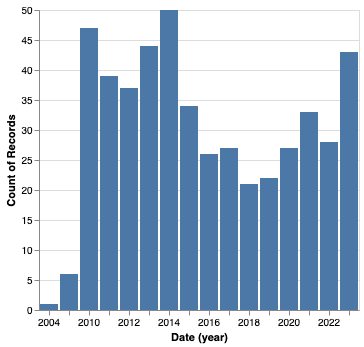

In [9]:
PR.vis.barchart(cols_fixed_df_persist, "year(Date):O", "count()")

In [10]:
post_2010_df_persist

,Aspect,Coordinates,Date,Depth_inches,Elevation_feet,Place,Region,Trigger,Vertical_inches,Weak_Layer,Width_inches
0,Northeast,"40.855013000000, -110.707083000000",2013-02-03,16,11000,Millcreek,Uintas,Snowmobiler,1800,Facets,1200
1,West,"41.955086005660, -111.540970789520",2021-01-01,4,7000,Beaver Canyon,Logan,Snowboarder,360,Facets,300
2,East,"41.921030185963, -111.693985449420",2018-05-15,48,9300,"Cherry Peak, East Face",Logan,Natural,4800,Unknown,3600
3,East,"41.677180699017, -112.027609335430",2022-12-31,36,8500,Gibson Canyon,Logan,Natural,27000,Facets,12000
4,Unknown,"40.669832191946, -111.719326960160",2021-02-14,36,9500,West Porter,Salt Lake,Natural,12000,Depth Hoar,42000
...,...,...,...,...,...,...,...,...,...,...,...
480,East,"41.923839329855, -111.438446032140",2022-12-21,24,7400,East of Mahogany Drive,Logan,Natural,6000,Facets,6000
481,North,"0.000000000000, 0.000000000000",2010-02-27,24,9900,White Pine Canyon,Salt Lake,Skier,2400,Unknown,1200
482,South,"41.326665657790, -111.903948771030",2019-01-22,7,7000,North Ogden Divide,Ogden,Skier,1200,New Snow/Old Snow Interface,180
483,North,"40.664320787071, -111.752886759330",2023-01-16,12,7900,Thomas Fork,Salt Lake,Skier,600,New Snow/Old Snow Interface,600


#### Pandas solution

In [11]:
post_2010_df_pandas = post_2010_df_persist
post_2010_df_pandas

,Aspect,Coordinates,Date,Depth_inches,Elevation_feet,Place,Region,Trigger,Vertical_inches,Weak_Layer,Width_inches
0,Northeast,"40.855013000000, -110.707083000000",2013-02-03,16,11000,Millcreek,Uintas,Snowmobiler,1800,Facets,1200
1,West,"41.955086005660, -111.540970789520",2021-01-01,4,7000,Beaver Canyon,Logan,Snowboarder,360,Facets,300
2,East,"41.921030185963, -111.693985449420",2018-05-15,48,9300,"Cherry Peak, East Face",Logan,Natural,4800,Unknown,3600
3,East,"41.677180699017, -112.027609335430",2022-12-31,36,8500,Gibson Canyon,Logan,Natural,27000,Facets,12000
4,Unknown,"40.669832191946, -111.719326960160",2021-02-14,36,9500,West Porter,Salt Lake,Natural,12000,Depth Hoar,42000
...,...,...,...,...,...,...,...,...,...,...,...
480,East,"41.923839329855, -111.438446032140",2022-12-21,24,7400,East of Mahogany Drive,Logan,Natural,6000,Facets,6000
481,North,"0.000000000000, 0.000000000000",2010-02-27,24,9900,White Pine Canyon,Salt Lake,Skier,2400,Unknown,1200
482,South,"41.326665657790, -111.903948771030",2019-01-22,7,7000,North Ogden Divide,Ogden,Skier,1200,New Snow/Old Snow Interface,180
483,North,"40.664320787071, -111.752886759330",2023-01-16,12,7900,Thomas Fork,Salt Lake,Skier,600,New Snow/Old Snow Interface,600


## Task 2

We will use the new dataset for avalanches post 2010 to further analyse relationship between phases of the avalanche season and other variables.

### Task 2a: Categorize data in phases

Out data is missing the data for phases of the season! We have to add a new column to the dataset called `Avalanche Season Phase`. The new column column will have three values: `Start`, `Middle`, `End`. You have to categorize the data into one of the columns depending on the month. Refer to the following order for assignment:
- **Dec - Feb** -> `Start`
- **Mar - May** -> `Middle`
- **June - Nov** -> `End`

<font color="steelblue">First, we have to create a new category and add options to it. You can click the add category button in the header to open the category popup. Make a new category called **Avalanche Season Phase**. Then add three new options to the category: **Start**, **Middle**, **End**.</font>

<font color="steelblue">The barchart below is an interactive altair plot. You can select the bars in the plot by clicking on them. Press `shift` while clicking to select multiple bars. Clicking on empty area in the chart, clears the selection.</font>

<font color="steelblue">When select the months that should belong to the same category, you can use the categorize button in the header to assign the proper category to your selection.</font>

<font color="steelblue">When you are done with all the categorization, create a new dataframe called **season_phase_df** and print it in the next cell.</font>


<font color="red">The barchart below is a barchart in seaborn.</font>

<font color="red">Assign categories to different subsets of the data using pandas.</font>

<font color="red">Assign the new dataframe to a variable called **season_phase_df** and plot it the same as the barchart earlier</font>

Abstract: Cateogrize the data. Start with creating category and then categorize

#### Persist solution

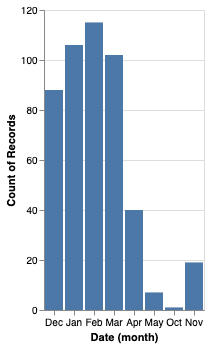

In [12]:
PR.vis.barchart(post_2010_df_persist, alt.X("month(Date):O").sort(["Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov"]), "count()")

In [13]:
season_phase_data_persist

,Aspect,Coordinates,Date,Depth_inches,Elevation_feet,Place,Region,Trigger,Vertical_inches,Weak_Layer,Width_inches,Avlanche Season Phase
0,Northeast,"40.855013000000, -110.707083000000",2013-02-03,16,11000,Millcreek,Uintas,Snowmobiler,1800,Facets,1200,Start
1,West,"41.955086005660, -111.540970789520",2021-01-01,4,7000,Beaver Canyon,Logan,Snowboarder,360,Facets,300,Start
2,East,"41.921030185963, -111.693985449420",2018-05-15,48,9300,"Cherry Peak, East Face",Logan,Natural,4800,Unknown,3600,Middle
3,East,"41.677180699017, -112.027609335430",2022-12-31,36,8500,Gibson Canyon,Logan,Natural,27000,Facets,12000,Start
4,Unknown,"40.669832191946, -111.719326960160",2021-02-14,36,9500,West Porter,Salt Lake,Natural,12000,Depth Hoar,42000,Start
...,...,...,...,...,...,...,...,...,...,...,...,...
473,East,"41.923839329855, -111.438446032140",2022-12-21,24,7400,East of Mahogany Drive,Logan,Natural,6000,Facets,6000,Start
474,North,"0.000000000000, 0.000000000000",2010-02-27,24,9900,White Pine Canyon,Salt Lake,Skier,2400,Unknown,1200,Start
475,South,"41.326665657790, -111.903948771030",2019-01-22,7,7000,North Ogden Divide,Ogden,Skier,1200,New Snow/Old Snow Interface,180,Start
476,North,"40.664320787071, -111.752886759330",2023-01-16,12,7900,Thomas Fork,Salt Lake,Skier,600,New Snow/Old Snow Interface,600,Start


#### Pandas solution

In [14]:
season_phase_data_pandas = season_phase_data_persist
season_phase_data_pandas.head()

,Aspect,Coordinates,Date,Depth_inches,Elevation_feet,Place,Region,Trigger,Vertical_inches,Weak_Layer,Width_inches,Avlanche Season Phase
0,Northeast,"40.855013000000, -110.707083000000",2013-02-03,16,11000,Millcreek,Uintas,Snowmobiler,1800,Facets,1200,Start
1,West,"41.955086005660, -111.540970789520",2021-01-01,4,7000,Beaver Canyon,Logan,Snowboarder,360,Facets,300,Start
2,East,"41.921030185963, -111.693985449420",2018-05-15,48,9300,"Cherry Peak, East Face",Logan,Natural,4800,Unknown,3600,Middle
3,East,"41.677180699017, -112.027609335430",2022-12-31,36,8500,Gibson Canyon,Logan,Natural,27000,Facets,12000,Start
4,Unknown,"40.669832191946, -111.719326960160",2021-02-14,36,9500,West Porter,Salt Lake,Natural,12000,Depth Hoar,42000,Start


### Task 2b:

Abstract: Note an interesting pattern based on the plot created from the newly categorized data.


Branches for iteration not for analysis

In [1]:
PR.vis.barchart(season_phase_data_persist, alt.X("Trigger:N").sort("-y"), "count()").facet(alt.Facet("Avlanche Season Phase:N").sort(["Start", "Middle", "End"]))

NameError: name 'PR' is not defined

In [ ]:
PR.vis.barchart(season_phase_data, alt.X("Aspect:N").sort("-y"), "count()").facet(alt.Facet("Avlanche Season Phase:N").sort(["Start", "Middle", "End"]))

In [ ]:
PR.vis.barchart(season_phase_data, alt.X("Vertical_inches:Q").bin().sort("-y"), "count()").facet(alt.Facet("Avlanche Season Phase:N").sort(["Start", "Middle", "End"]))

In [ ]:
PR.vis.heatmap(season_phase_data_persist, "Avlanche Season Phase:N", "Aspect:N", "mean(Depth_inches)")